# Structure of a data analysis -- in Python 

In [5]:
import numpy as np
import pandas as pd
import os
os.getcwd()

'C:\\Users\\KESJ\\code\\python\\ipythonNotebooks'

In [10]:
# load an R dataset ('spam' from the kernlab library -- I converted it to csv first)
os.chdir('../../../data/miscDataSets/')
fname = "spam.csv"

WindowsError: [Error 3] The system cannot find the path specified: '../../../data/miscDataSets/'

In [13]:
data = np.genfromtxt(fname,names=True,delimiter=',',dtype=None)
shape(data)

(4601,)

In [15]:
data['type']

array(['"spam"', '"spam"', '"spam"', ..., '"nonspam"', '"nonspam"',
       '"nonspam"'], 
      dtype='|S9')

In [35]:
data[0][2]

0.64000000000000001

### Generate a random index over the 4601 rows.

In [16]:
np.random.seed(3435)
trainIndicator = np.random.binomial(1, 0.5, 4601)
np.bincount(trainIndicator)

array([2233, 2368])

In [19]:
# split into training and test data
trainSpam = data[trainIndicator == 1]
testSpam = data[trainIndicator == 0]
trainSpam.shape


(2368,)

In [23]:
# show column names
trainSpam.dtype.names

('f0',
 'make',
 'address',
 'all',
 'num3d',
 'our',
 'over',
 'remove',
 'internet',
 'order',
 'mail',
 'receive',
 'will',
 'people',
 'report',
 'addresses',
 'free',
 'business',
 'email',
 'you',
 'credit',
 'your',
 'font',
 'num000',
 'money',
 'hp',
 'hpl',
 'george',
 'num650',
 'lab',
 'labs',
 'telnet',
 'num857',
 'data',
 'num415',
 'num85',
 'technology',
 'num1999',
 'parts',
 'pm',
 'direct',
 'cs',
 'meeting',
 'original',
 'project',
 're',
 'edu',
 'table',
 'conference',
 'charSemicolon',
 'charRoundbracket',
 'charSquarebracket',
 'charExclamation',
 'charDollar',
 'charHash',
 'capitalAve',
 'capitalLong',
 'capitalTotal',
 'type')

# Using pandas

In [40]:
spam = pd.read_csv(fname,header=0)
#load the data

In [41]:
spam.keys()
#show the column names

Index([Unnamed: 0, make, address, all, num3d, our, over, remove, internet, order, mail, receive, will, people, report, addresses, free, business, email, you, credit, your, font, num000, money, hp, hpl, george, num650, lab, labs, telnet, num857, data, num415, num85, technology, num1999, parts, pm, direct, cs, meeting, original, project, re, edu, table, conference, charSemicolon, charRoundbracket, charSquarebracket, charExclamation, charDollar, charHash, capitalAve, capitalLong, capitalTotal, type], dtype=object)

In [46]:
del spam['Unnamed: 0']
# remove the first column (just an index)

In [48]:
# create the test & training subsets:
# split into training and test data
trainSpam = spam.ix[trainIndicator == 1]
testSpam = spam.ix[trainIndicator == 0]
trainSpam.shape

(2368, 58)

#### Peak at the beginning of the file

In [57]:
# this is the equivalent of R head command
#trainSpam.ix[:,:20].head()
trainSpam.ix[:,:10].head()

,make,address,all,num3d,our,over,remove,internet,order,mail
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63
8,0.15,0.00,0.46,0,0.61,0.00,0.30,0.00,0.92,0.76
9,0.06,0.12,0.77,0,0.19,0.32,0.38,0.00,0.06,0.00


In [58]:
# compute frequency counts, similar to R table command
trainSpam['type'].value_counts()

nonspam    1454
spam        914
dtype: int64

### Plots

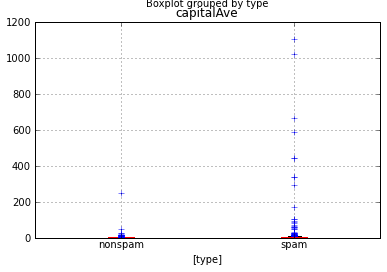

In [59]:
# boxplot using pandas boxplot
from pandas.tools.plotting import boxplot

boxplot(trainSpam, column='capitalAve', by='type');


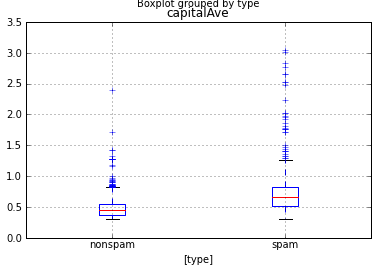

In [60]:
# take the log
#
# use the apply() function to compute the log
df = trainSpam[['capitalAve', 'type']]
df['capitalAve'] = df['capitalAve'].apply(lambda x: np.log10(x + 1))

boxplot(df, column='capitalAve', by='type');


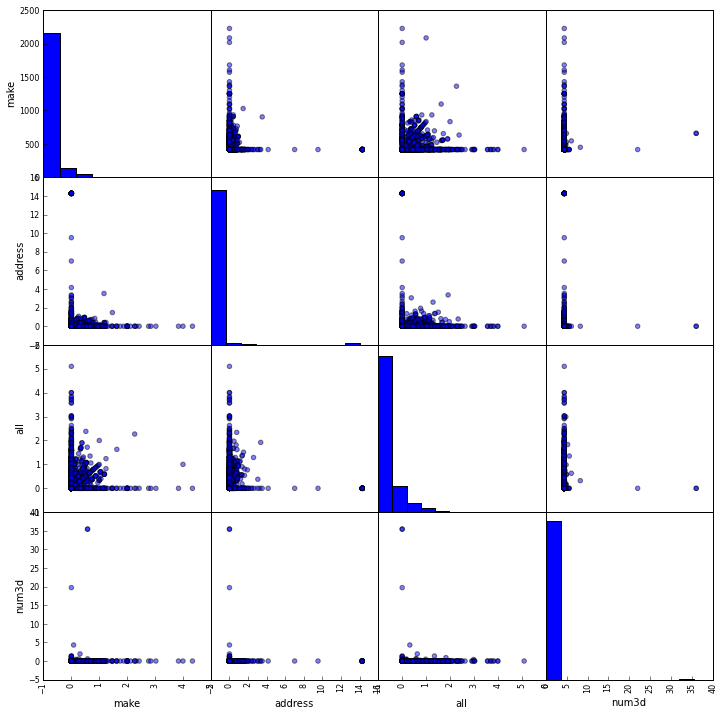

In [62]:
# relationships between predictors
from pandas.tools.plotting import scatter_matrix

scatter_matrix(trainSpam[['make', 'address', 'all', 'num3d']], figsize=(12, 12), marker='o');


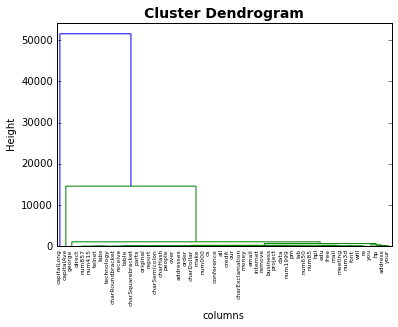

In [71]:
# hierarchical clustering using scipy
# compute distance matrix
from scipy.spatial.distance import pdist, squareform
distxy = squareform(pdist(trainSpam.ix[:,:56].T, metric='euclidean'))
#import scipy.cluster.hierarchy as hierarch
#Y = hierarch.distance.pdist(trainSpam.ix[:,:56].T)
#Z = hierarch.linkage(Y)
#figure
#hierarch.dendrogram(Z,labels=trainSpam.ix[:,:56].columns)
#from sklearn.metrics.pairwise import pairwise_distances
#D = pairwise_distances(trainSpam.ix[:,:56].T)
#from hcluster import pdist, linkage, dendrogram
#dendrogram(linkage(pdist(trainSpam.ix[:,:56].T)), labels=trainSpam.ix[:,:56].columns)



# perform clustering and plot the dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

R = dendrogram(linkage(distxy, method='complete'),labels=trainSpam.ix[:,:56].columns)

xlabel('columns')
ylabel('Height')
title('Cluster Dendrogram', fontweight='bold', fontsize=14)

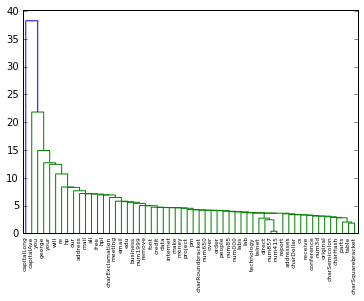

In [73]:
#take the log
R = dendrogram(linkage(pdist(trainSpam.ix[:,:56].T.apply(lambda x: np.log10(x+1)))),
               labels = trainSpam.ix[:,:56].columns)

# Summarizing some data

##### Use the data from this url: fileUrl = 'http://earthquake.usgs.gov/earthquakes/catalogs/eqs7day-M1.txt'

In [76]:
fileUrl = 'eqs7day-M1.txt'
eData = pd.read_csv(fileUrl)


dataDownloaded = !date
dataDownloaded

['The current date is: Thu 08/01/2013 ', 'Enter the new date: (mm-dd-yy) ']

In [80]:
eData.ix]

Src                                              ak
Eqid                                       10772627
Version                                           1
Datetime     Thursday, August  1, 2013 17:49:02 UTC
Lat                                         61.6436
Lon                                       -147.2215
Magnitude                                       3.2
Depth                                          17.9
NST                                              43
Region                              Southern Alaska
Name: 1, dtype: object

In [89]:
eData = eData.drop(eData.index[0])
#removed the 2nd line that was a comment --> note now index runs from 1 to N

In [94]:
eData.head()

Src      Eqid Version                                Datetime      Lat  \
1  ak  10772627       1  Thursday, August  1, 2013 17:49:02 UTC  61.6436   
2  nc  72041326       0  Thursday, August  1, 2013 16:50:49 UTC  38.8432   
3  us  b000itdc       8  Thursday, August  1, 2013 16:39:59 UTC  49.5921   
4  ak  10772389       1  Thursday, August  1, 2013 16:19:19 UTC  63.0061   
5  nc  72041301       1  Thursday, August  1, 2013 15:51:15 UTC  37.5392   

        Lon  Magnitude  Depth  NST               Region  
1 -147.2215        3.2   17.9   43      Southern Alaska  
2 -122.8398        1.0    2.2   15  Northern California  
3  156.1113        5.1   56.5  175        Kuril Islands  
4 -150.3141        2.3    0.5   26       Central Alaska  
5 -118.8772        1.9    8.0   29   Central California

In [95]:
# compute the quintiles (like R quantile()):
p = [0,0.25,0.5,0.75,1]
[eData['Lat'].quantile(q=i) for i in p]

[-60.3977, 34.104849999999999, 38.8307, 59.406500000000001, 76.993499999999997]

In [96]:
eData.describe()

,Lat,Lon,Magnitude,Depth,NST
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,40.510913,-106.293413,2.003140,28.835231,23.456330
std,19.631229,75.077417,1.088117,59.975059,27.172714
min,-60.397700,-178.845300,1.000000,0.000000,0.000000
25%,34.104850,-148.756150,1.200000,4.600000,11.000000
50%,38.830700,-121.428300,1.600000,10.000000,16.000000
75%,59.406500,-116.288750,2.300000,28.000000,27.000000
max,76.993500,179.749200,6.200000,616.100000,411.000000


In [99]:
# list the types of each column --> zip() is used just to print this together
zip(eData.columns, [type(x) for x in eData.ix[1,:]])

[('Src', str),
 ('Eqid', str),
 ('Version', str),
 ('Datetime', str),
 ('Lat', numpy.float64),
 ('Lon', numpy.float64),
 ('Magnitude', numpy.float64),
 ('Depth', numpy.float64),
 ('NST', numpy.float64),
 ('Region', str)]

In [101]:
# get unique values for a given column
eData['Src'].unique(), len(eData['Src'].unique())

(array(['ak', 'nc', 'us', 'ci', 'uw', 'pr', 'nn', 'uu', 'hv', 'mb', 'nm',
       'ld', 'se'], dtype=object),
 13)

In [102]:
eData['Src'].value_counts()

ak    334
nc    189
ci    142
us    119
pr     60
nn     54
uw     35
hv     31
uu     29
mb     15
nm      5
se      4
ld      2
dtype: int64

In [103]:
#compute frequency table
pd.crosstab(eData['Src'],eData['Version'])

Version,0,1,2,3,4,5,6,7,8,9,A,B,C
Src,,,,,,,,,,,,,
ak,0,109,208,17,0,0,0,0,0,0,0,0,0
ci,0,0,71,1,61,6,3,0,0,0,0,0,0
hv,0,14,12,1,4,0,0,0,0,0,0,0,0
ld,0,2,0,0,0,0,0,0,0,0,0,0,0
mb,0,1,14,0,0,0,0,0,0,0,0,0,0
nc,83,28,31,36,2,6,1,1,0,0,0,0,1
nm,0,0,0,0,0,0,0,0,0,0,5,0,0
nn,0,54,0,0,0,0,0,0,0,0,0,0,0
pr,60,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
# look to see if a given column has any values matching the criteria:
(eData['Lat']> 40).any()

True

In [106]:
# check if all values match the criteria
(eData['Lat'] > 40).all()

False

In [110]:
# exploring subsets; (similar to R's & operator)
eData[(eData['Lat']> 40) & (eData['Lon']> 30)][['Lat','Lon']]

,Lat,Lon
3,49.5921,156.1113
70,51.3785,179.7492
107,51.0590,178.2611
124,44.8360,143.1169
173,41.6827,142.5406
268,51.9374,179.7232
350,52.1673,179.0996
437,45.9104,143.0497
494,52.0745,178.9349
507,52.3508,179.6756


#### Camera data

In [112]:
cameraData = pd.read_csv('Baltimore_Fixed_Speed_Cameras.csv')
dateDownloaded = !date
print dateDownloaded

['The current date is: Thu 08/01/2013 ', 'Enter the new date: (mm-dd-yy) ']


In [113]:
cameraData.head()

address direction       street   crossStreet  \
0        S CATON AVE & BENSON AVE       N/B    Caton Ave    Benson Ave   
1        S CATON AVE & BENSON AVE       S/B    Caton Ave    Benson Ave   
2  WILKENS AVE & PINE HEIGHTS AVE       E/B  Wilkens Ave  Pine Heights   
3         THE ALAMEDA & E 33RD ST       S/B  The Alameda       33rd St   
4         E 33RD ST & THE ALAMEDA       E/B       E 33rd   The Alameda   

                 intersection                       Location 1  
0      Caton Ave & Benson Ave  (39.2693779962, -76.6688185297)  
1      Caton Ave & Benson Ave  (39.2693157898, -76.6689698176)  
2  Wilkens Ave & Pine Heights   (39.2720252302, -76.676960806)  
3      The Alameda  & 33rd St  (39.3285013141, -76.5953545714)  
4       E 33rd  & The Alameda  (39.3283410623, -76.5953594625)

In [114]:
cameraData.columns

Index([address, direction, street, crossStreet, intersection, Location 1], dtype=object)

In [115]:
cameraData.ix[0]

address                S CATON AVE & BENSON AVE
direction                                   N/B
street                                Caton Ave
crossStreet                          Benson Ave
intersection             Caton Ave & Benson Ave
Location 1      (39.2693779962, -76.6688185297)
Name: 0, dtype: object